In [1]:
from data import load_data, GS_Dataset, make_gs_dataset, GS_Results, convert_to_narx
from model import Narx, DEVICE
from util_fun import train_narx, narx_sim_nrms, calculate_error_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
n_a=15
n_b=15
n_layers=5
n_nodes=50
n_epochs=15000

In [3]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)

In [4]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [5]:
results:GS_Results = train_narx(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 0.9990504570769093, previous best pred NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.05848175582864452, previous best pred NRMS: 0.9990504570769093 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.044280938658766, previous best pred NRMS: 0.05848175582864452 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.03910858085385658, previous best pred NRMS: 0.044280938658766 

Checkpoint at epoch 2401:  

current best pred NRMS: 0.03645903197121181, previous best pred NRMS: 0.03910858085385658 

Checkpoint at epoch 3001:  

current best pred NRMS: 0.034724847169186404, previous best pred NRMS: 0.03645903197121181 

Checkpoint at epoch 3601:  

current best pred NRMS: 0.032761782811233195, previous best pred NRMS: 0.034724847169186404 

Checkpoint at epoch 4201:  

current best pred NRMS: 0.03155632468037808, previous best pred NRMS: 0.032761782811233195 

Checkpoint at epoch 4801:  

current best pred NRMS: 0

In [6]:
torch.save(results.best_model.state_dict(), f'narx{n_epochs//1000}K_na{n_a}_nb{n_b}_nlay{n_layers}_nnode{n_nodes}_pred')

In [10]:
x_all, y_all =convert_to_narx(data.x_data, data.y_data, n_a, n_b)
x_all, y_all=x_all.to(DEVICE), y_all.to(DEVICE)
y_all_pred=results.best_model(x_all)

In [11]:
f'val: {calculate_error_nrms(results.best_model(data.x_val),data.y_val):.2%} train: {calculate_error_nrms(results.best_model(data.x_train),data.y_train):.2%} total:{calculate_error_nrms(y_all_pred,y_all):.2%}'

'val: 1.97% train: 0.60% total:1.13%'

Text(0, 0.5, 'Angle [rad]')

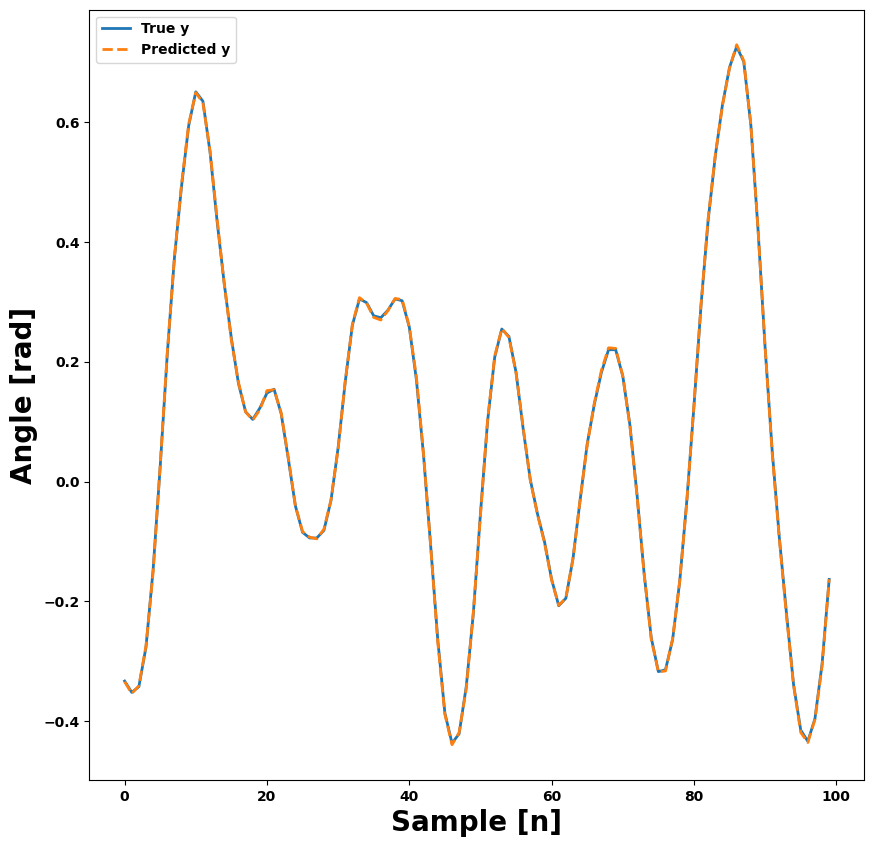

In [12]:
start=0
end=100
fs=20
plt.figure(figsize=(10,10))
plt.plot(y_all.detach().cpu()[start:end], label='True y', lw=2)
plt.plot(y_all_pred.detach().cpu()[start:end], label='Predicted y', ls='--', lw=2)
plt.legend()
plt.xlabel('Sample [n]',fontsize=fs)
plt.ylabel('Angle [rad]',fontsize=fs)